<a href="https://colab.research.google.com/github/jeffiThomas/IoTAgricultureProject/blob/main/FinalMergedCode/FinalAAI530MergedCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code for IoT Agriculture Project
## GitHub Link: https://github.com/jeffiThomas/IoTAgricultureProject

#Data Loading and Merging

In [ ]:
import os

os.listdir('/content/drive/MyDrive/IoTAgricultureProject')


['data', 'notebooks']

In [ ]:
import os

data_path = "/content/drive/MyDrive/IoTAgricultureProject/data/"
os.listdir(data_path)


['Solar Panel Battery Voltage.xlsx',
 'Environment Light Intensity.xlsx',
 'Water TDS.xlsx',
 'Soil pH.xlsx',
 'Environment Humidity.xlsx',
 'Soil Moisture.xlsx',
 'Environment Temperature.xlsx',
 'Soil Temperature.xlsx']

##Reading Seperate Files

In [ ]:
import pandas as pd

env_humidity = pd.read_excel(data_path + "Environment Humidity.xlsx")
env_light = pd.read_excel(data_path + "Environment Light Intensity.xlsx")
env_temp = pd.read_excel(data_path + "Environment Temperature.xlsx")

soil_moisture = pd.read_excel(data_path + "Soil Moisture.xlsx")
soil_ph = pd.read_excel(data_path + "Soil pH.xlsx")
soil_temp = pd.read_excel(data_path + "Soil Temperature.xlsx")

solar_voltage = pd.read_excel(data_path + "Solar Panel Battery Voltage.xlsx")
water_tds = pd.read_excel(data_path + "Water TDS.xlsx")


In [ ]:
env_humidity.head()

,Environment Humidity,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(%)
1,2024-09-27 12:58:10 +0530,2245,95
2,2024-09-27 12:58:28 +0530,2246,95
3,2024-09-27 12:59:03 +0530,2247,95
4,2024-09-27 12:59:22 +0530,2248,95


In [ ]:
env_light.head()
env_temp

,Environment Temperature,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(Degree Celsius)
1,2024-09-27 12:58:10 +0530,2245,26.2
2,2024-09-27 12:58:28 +0530,2246,26.2
3,2024-09-27 12:59:03 +0530,2247,26.2
4,2024-09-27 12:59:22 +0530,2248,26.2
...,...,...,...
96,2024-09-27 13:27:19 +0530,2340,26.7
97,2024-09-27 13:27:37 +0530,2341,26.7
98,2024-09-27 13:27:55 +0530,2342,26.7
99,2024-09-27 13:28:13 +0530,2343,26.7


In [ ]:
print(env_humidity.columns)
print(env_light.columns)
print(env_temp.columns)

print(soil_moisture.columns)
print(soil_ph.columns)
print(soil_temp.columns)

print(solar_voltage.columns)
print(water_tds.columns)

Index(['Environment Humidity', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Environment Light Intensity', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Environment Temperature', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Soil Moisture', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Soil pH', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Soil Temperature', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Solar Panel Battery Voltage', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['Water TDS', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')


In [ ]:
test = pd.read_excel(
    data_path + "Environment Temperature.xlsx",
    header=1
)

test.head()


,Date & Time Created,Entry_id,Measurement Unit(Degree Celsius)
0,2024-09-27 12:58:10 +0530,2245,26.2
1,2024-09-27 12:58:28 +0530,2246,26.2
2,2024-09-27 12:59:03 +0530,2247,26.2
3,2024-09-27 12:59:22 +0530,2248,26.2
4,2024-09-27 12:59:45 +0530,2249,26.2


##Timestamping

In [ ]:
def load_sensor_excel(filename, value_col_name):
    df = pd.read_excel(data_path + filename, header=1)

    # standardize timestamp
    timestamp_col = None
    if 'Date & Time Created' in df.columns:
        timestamp_col = 'Date & Time Created'
    elif 'Date & Time of Creation' in df.columns:
        timestamp_col = 'Date & Time of Creation'
    else:
        raise KeyError(f"No recognized timestamp column found in {filename}. Columns found: {df.columns.tolist()}")

    df["timestamp"] = pd.to_datetime(df[timestamp_col])
    df = df.sort_values("timestamp")

    # keep only what we need
    df = df[["timestamp", value_col_name]]

    return df

In [ ]:
env_temp = load_sensor_excel(
    "Environment Temperature.xlsx",
    "Measurement Unit(Degree Celsius)"
)

env_humidity = load_sensor_excel(
    "Environment Humidity.xlsx",
    "Measurement Unit(%)"
)

env_light = load_sensor_excel(
    "Environment Light Intensity.xlsx",
    "Mesaurement Unit(Lux)"
)

soil_moisture = load_sensor_excel(
    "Soil Moisture.xlsx",
    "Measurement Unit(%)"
)

soil_ph = load_sensor_excel(
    "Soil pH.xlsx",
    "Measurement Unit (pH)"
)

soil_temp = load_sensor_excel(
    "Soil Temperature.xlsx",
    "Measurement Unit(Degree Celsius)"
)

solar_voltage = load_sensor_excel(
    "Solar Panel Battery Voltage.xlsx",
    "Measurement Unit(Volts)"
)

water_tds = load_sensor_excel(
    "Water TDS.xlsx",
    "Measurement Unit(mg/L)"
)

In [ ]:
solar_voltage.head()


,timestamp,Measurement Unit(Volts)
0,2024-09-27 12:58:10+05:30,3.550
1,2024-09-27 12:58:28+05:30,3.552
2,2024-09-27 12:59:03+05:30,3.554
3,2024-09-27 12:59:22+05:30,3.556
4,2024-09-27 12:59:45+05:30,3.557


##Merging

In [ ]:
#merge into one
df = env_temp \
    .merge(env_humidity, on="timestamp", how="inner") \
    .merge(env_light, on="timestamp", how="inner") \
    .merge(soil_moisture, on="timestamp", how="inner") \
    .merge(soil_ph, on="timestamp", how="inner") \
    .merge(soil_temp, on="timestamp", how="inner") \
    .merge(solar_voltage, on="timestamp", how="inner") \
    .merge(water_tds, on="timestamp", how="inner")


In [ ]:
df.head()


,timestamp,Measurement Unit(Degree Celsius)_x,Measurement Unit(%)_x,Mesaurement Unit(Lux),Measurement Unit(%)_y,Measurement Unit (pH),Measurement Unit(Degree Celsius)_y,Measurement Unit(Volts),Measurement Unit(mg/L)
0,2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68


##Renaming Columns

In [ ]:
column_rename_map = {
    'Measurement Unit(Degree Celsius)_x': 'Environment Temperature (Celsius)',
    'Measurement Unit(%)_x': 'Environment Humidity (%)',
    'Mesaurement Unit(Lux)': 'Environment Light Intensity (Lux)',
    'Measurement Unit(%)_y': 'Soil Moisture (%)',
    'Measurement Unit (pH)': 'Soil pH (pH)',
    'Measurement Unit(Degree Celsius)_y': 'Soil Temperature (Celsius)',
    'Measurement Unit(Volts)': 'Solar Panel Battery Voltage (Volts)',
    'Measurement Unit(mg/L)': 'Water TDS (mg/L)'
}

df = df.rename(columns=column_rename_map)
display(df.head())

,timestamp,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
0,2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68


In [ ]:
df.describe()

,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
count,99.000000,99.0,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000
mean,26.338384,95.0,43.195051,60.897677,6.100000e+00,18.142424,3.629111,118.492727
std,0.227993,0.0,13.923636,8.484388,1.160508e-14,0.049674,0.047936,14.068456
min,26.100000,95.0,14.170000,0.910000,6.100000e+00,18.100000,3.550000,0.510000
25%,26.100000,95.0,30.830000,61.580000,6.100000e+00,18.100000,3.588000,116.290000
50%,26.300000,95.0,43.330000,62.950000,6.100000e+00,18.100000,3.628000,119.910000
75%,26.500000,95.0,55.415000,63.640000,6.100000e+00,18.200000,3.668000,123.510000
max,26.900000,95.0,71.670000,64.220000,6.100000e+00,18.200000,3.717000,155.420000


The dataframe `df` is saveed to a Parquet file in our `IoTAgricultureProject/data` folder.

In [ ]:
output_file_path = data_path + "merged_iot_data.parquet"
df.to_parquet(output_file_path, index=False)
print(f"DataFrame saved to: {output_file_path}")

DataFrame saved to: /content/drive/MyDrive/IoTAgricultureProject/data/merged_iot_data.parquet


Now, in any other Colab notebook, we can  load this Parquet file directly into a DataFrame using this:

In [ ]:
# In another notebook:
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd

# data_path = "/content/drive/MyDrive/IoTAgricultureProject/data/"
# loaded_df = pd.read_parquet(data_path + "merged_iot_data.parquet")
# display(loaded_df.head())


#Exploratory Data Analysis

In [ ]:
#load data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

data_path = "/content/drive/MyDrive/IoTAgricultureProject/data/"
loaded_df = pd.read_parquet(data_path + "merged_iot_data.parquet")
display(loaded_df.head())


Mounted at /content/drive


,timestamp,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
0,2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68


## Initial Data Overview

This shows basic information about the `loaded_df` DataFrame, like its shape, data types, and a summary of descriptive statistics (`.info()`, `.describe()`). This gives a quick understanding of the dataset's structure and potential issues.


In [ ]:
print("First 5 rows of loaded_df:")
display(loaded_df.head())

print("\nShape of loaded_df:")
print(loaded_df.shape)

print("\nInfo of loaded_df:")
loaded_df.info()

print("\nDescriptive statistics of loaded_df:")
display(loaded_df.describe())

First 5 rows of loaded_df:


,timestamp,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
0,2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68



Shape of loaded_df:
(99, 9)

Info of loaded_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype                                
---  ------                               --------------  -----                                
 0   timestamp                            99 non-null     datetime64[ns, pytz.FixedOffset(330)]
 1   Environment Temperature (Celsius)    99 non-null     float64                              
 2   Environment Humidity (%)             99 non-null     int64                                
 3   Environment Light Intensity (Lux)    99 non-null     float64                              
 4   Soil Moisture (%)                    99 non-null     float64                              
 5   Soil pH (pH)                         99 non-null     float64                              
 6   Soil Temperature (Celsius)           99 non-null     float64                

,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
count,99.000000,99.0,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000
mean,26.338384,95.0,43.195051,60.897677,6.100000e+00,18.142424,3.629111,118.492727
std,0.227993,0.0,13.923636,8.484388,1.160508e-14,0.049674,0.047936,14.068456
min,26.100000,95.0,14.170000,0.910000,6.100000e+00,18.100000,3.550000,0.510000
25%,26.100000,95.0,30.830000,61.580000,6.100000e+00,18.100000,3.588000,116.290000
50%,26.300000,95.0,43.330000,62.950000,6.100000e+00,18.100000,3.628000,119.910000
75%,26.500000,95.0,55.415000,63.640000,6.100000e+00,18.200000,3.668000,123.510000
max,26.900000,95.0,71.670000,64.220000,6.100000e+00,18.200000,3.717000,155.420000


## Handling Missing Values


Next, we go through and see if there are any missing values, and if so what to do with them


In [ ]:
print("Missing values per column:")
missing_values = loaded_df.isnull().sum()
display(missing_values)


Missing values per column:


,0
Environment Temperature (Celsius),0
Environment Humidity (%),0
Environment Light Intensity (Lux),0
Soil Moisture (%),0
Soil pH (pH),0
Soil Temperature (Celsius),0
Solar Panel Battery Voltage (Volts),0
Water TDS (mg/L),0


Since there are NO missing values, nothing needs to be adjusted here.

Next, time series data requires the timestamp column as a datetime object, so we handle that and set it as the index.


In [ ]:
loaded_df.set_index('timestamp', inplace=True)

print("DataFrame after setting 'timestamp' as index:")
display(loaded_df.head())

print("\nInfo of loaded_df after setting index:")
loaded_df.info()

DataFrame after setting 'timestamp' as index:


,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
timestamp,,,,,,,,
2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68



Info of loaded_df after setting index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2024-09-27 12:58:10+05:30 to 2024-09-27 13:28:13+05:30
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Environment Temperature (Celsius)    99 non-null     float64
 1   Environment Humidity (%)             99 non-null     int64  
 2   Environment Light Intensity (Lux)    99 non-null     float64
 3   Soil Moisture (%)                    99 non-null     float64
 4   Soil pH (pH)                         99 non-null     float64
 5   Soil Temperature (Celsius)           99 non-null     float64
 6   Solar Panel Battery Voltage (Volts)  99 non-null     float64
 7   Water TDS (mg/L)                     99 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 7.0 KB


## Visualizations

Here, we plot the trends of key numerical features over time to identify patterns, seasonality, and any anomalies.


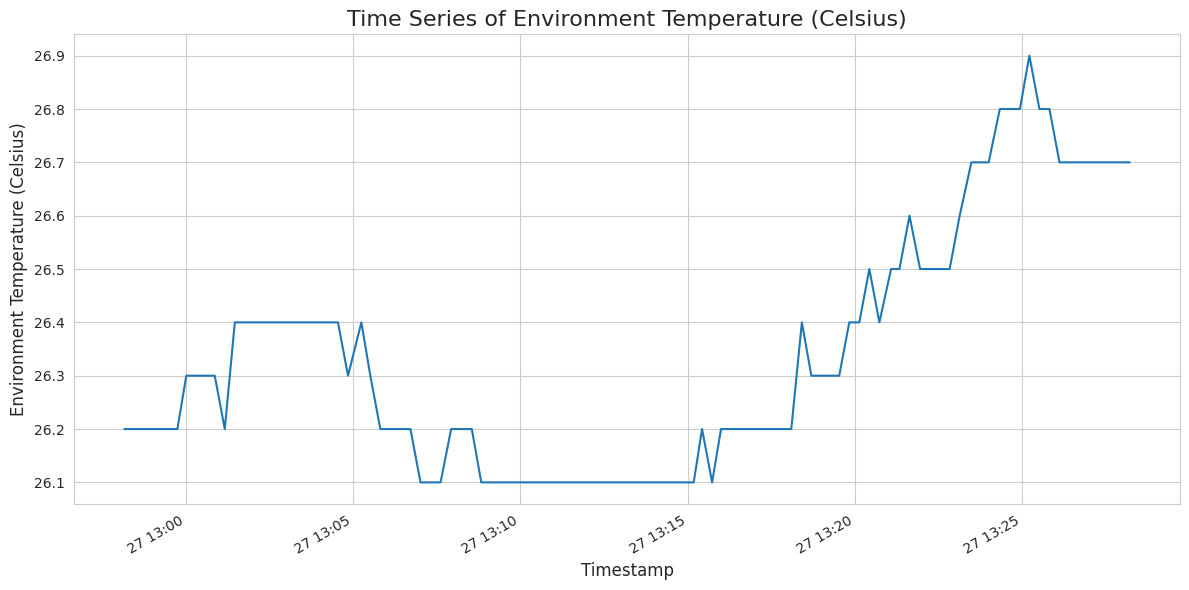

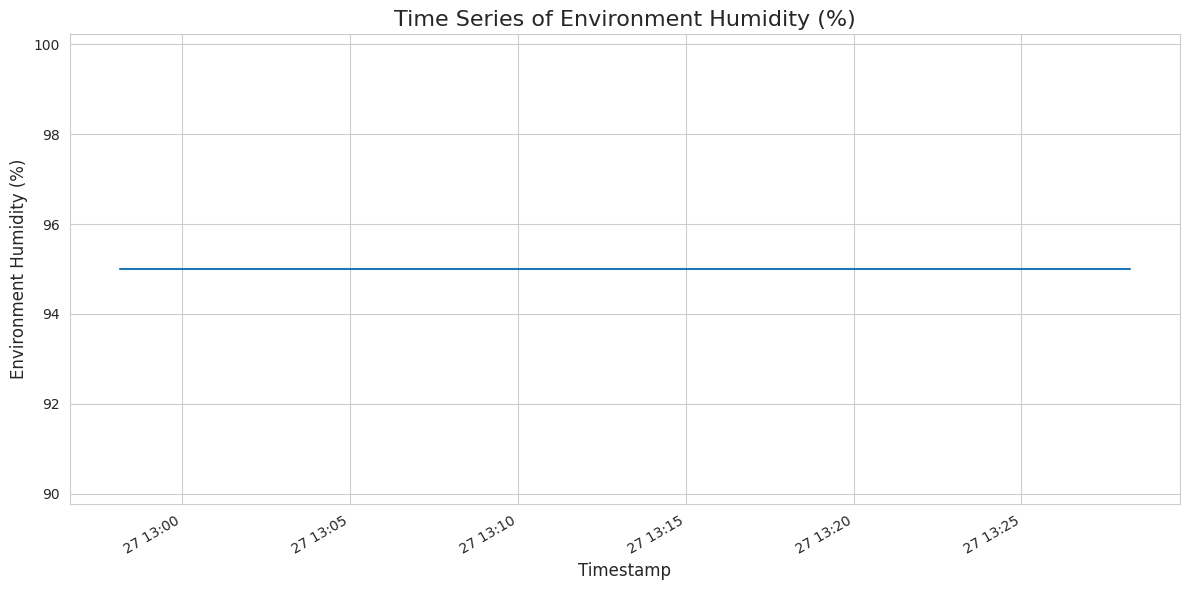

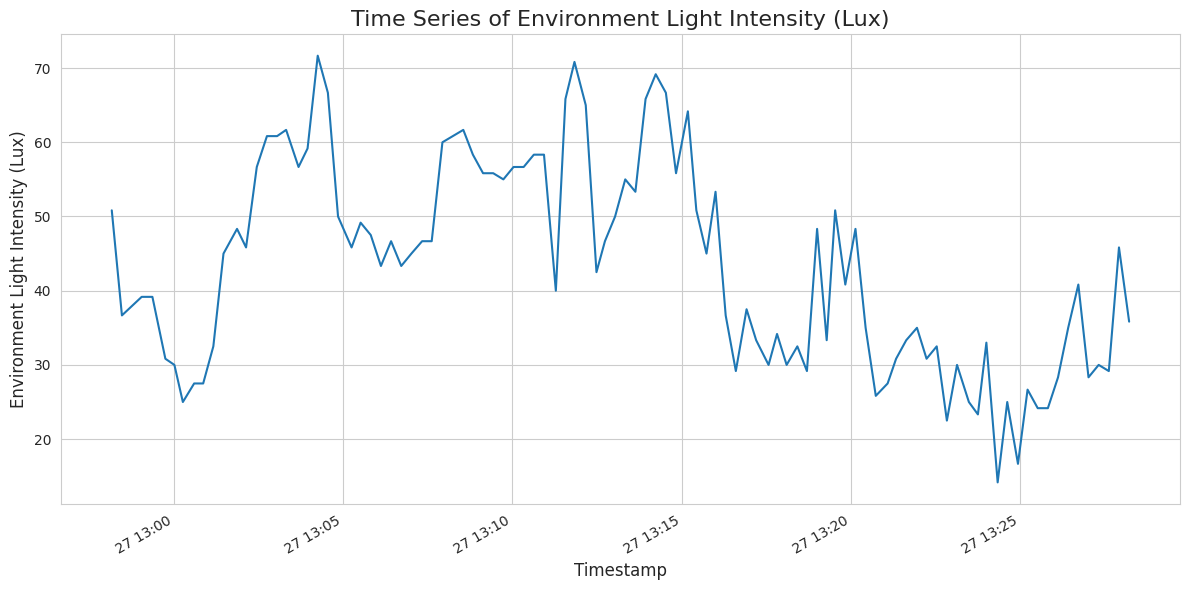

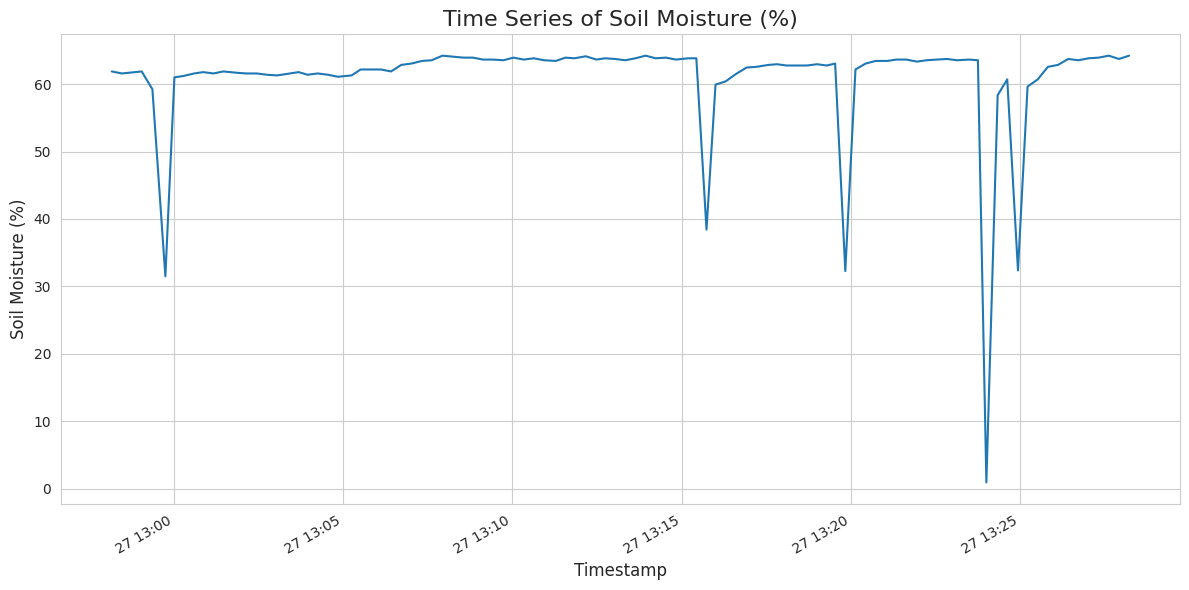

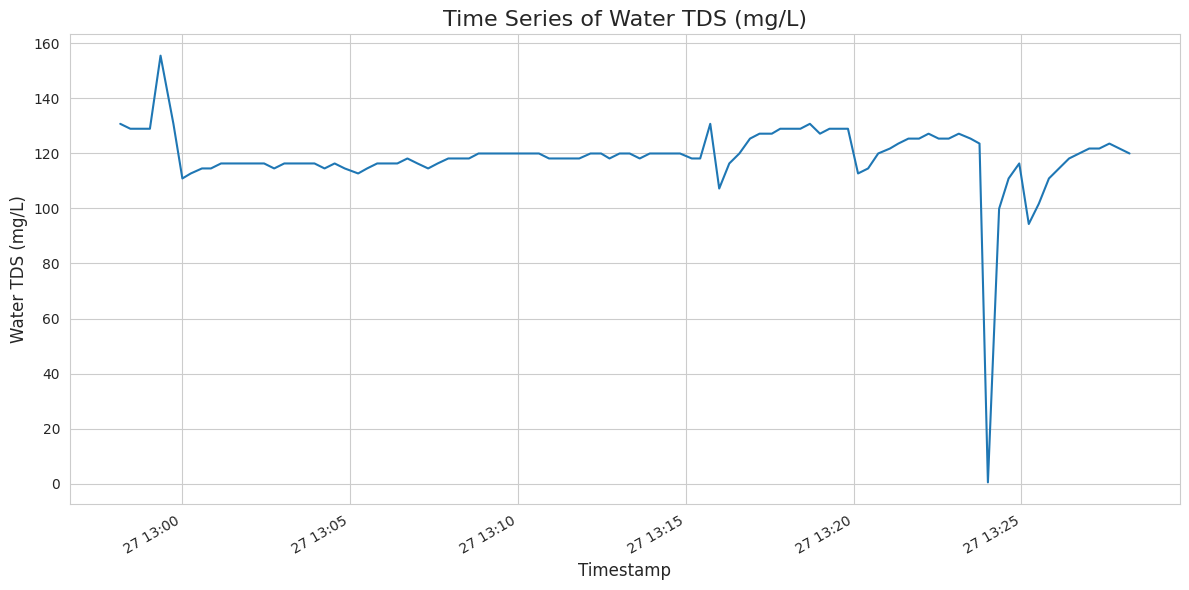

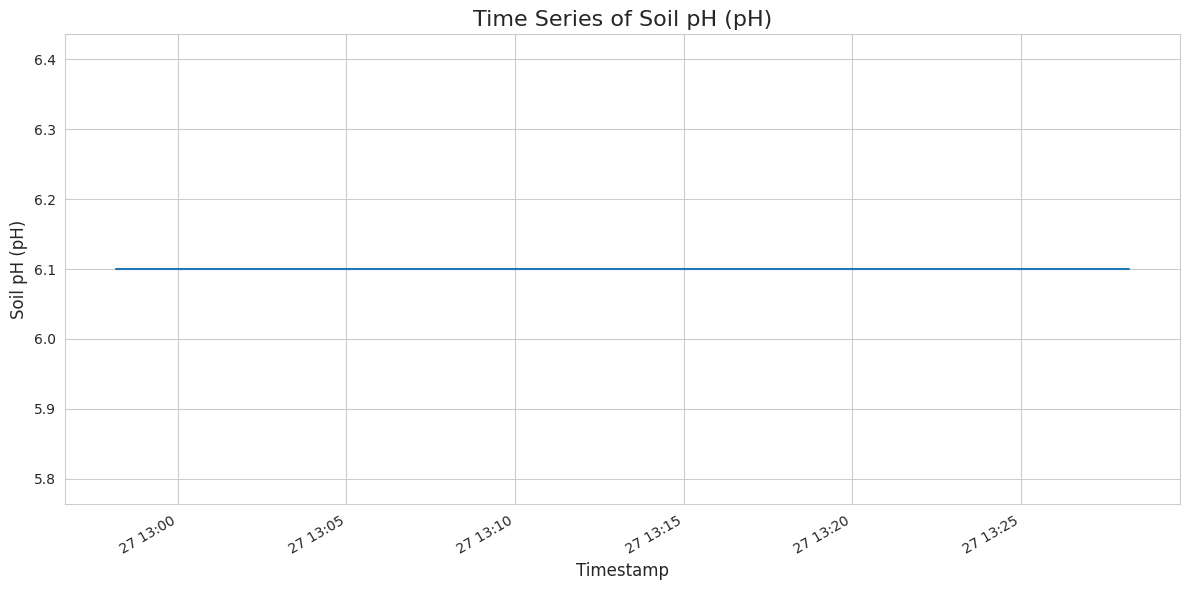

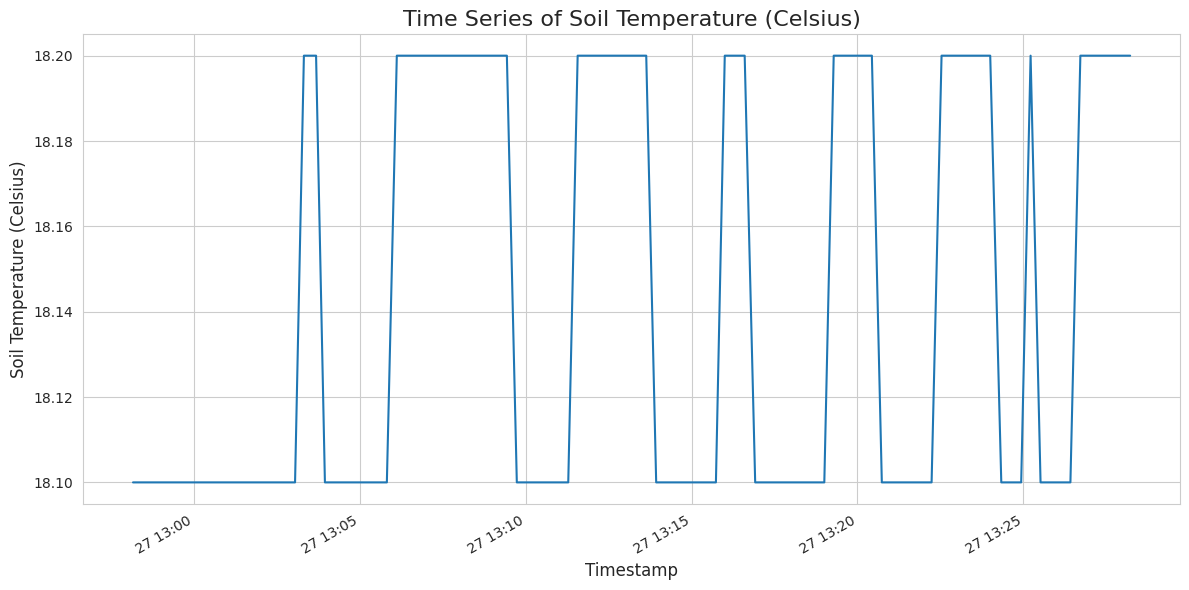

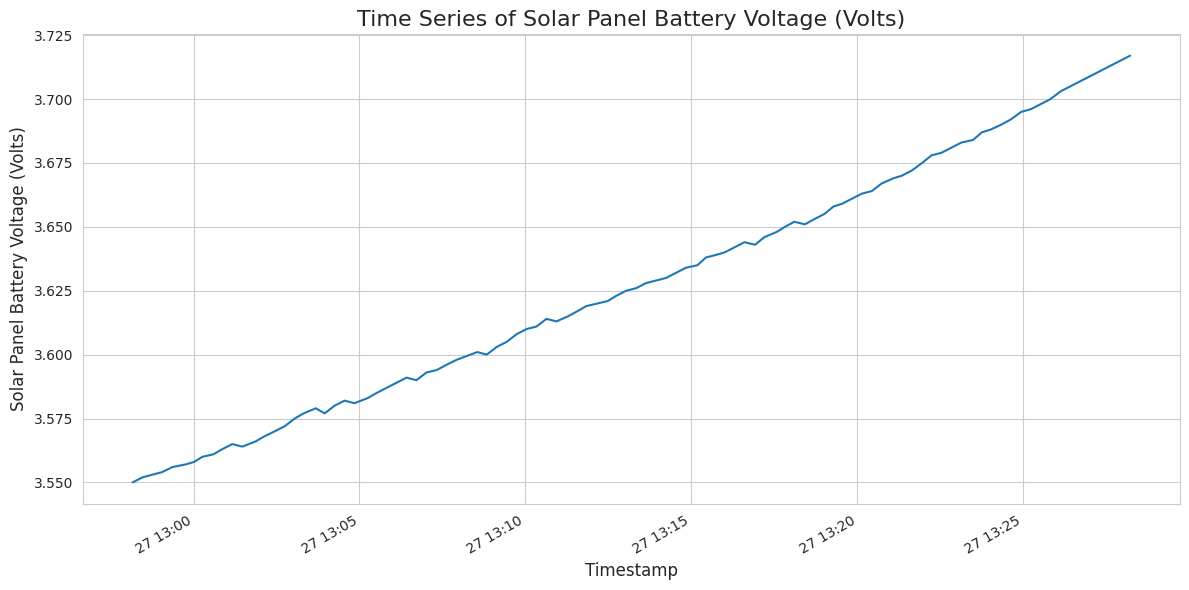

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set list of key numerical features to visalize
key_features = [
    'Environment Temperature (Celsius)',
    'Environment Humidity (%)',
    'Environment Light Intensity (Lux)',
    'Soil Moisture (%)',
    'Water TDS (mg/L)',
    'Soil pH (pH)',
    'Soil Temperature (Celsius)',
    'Solar Panel Battery Voltage (Volts)'
]

#sets bg to white
sns.set_style("whitegrid")


#creates time series plots for each feature
for feature in key_features:
    plt.figure(figsize=(12, 6))
    loaded_df[feature].plot()
    plt.title(f'Time Series of {feature}', fontsize=16)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Feature Distributions

Next, we will look at the distributions of the features throguh histograms.

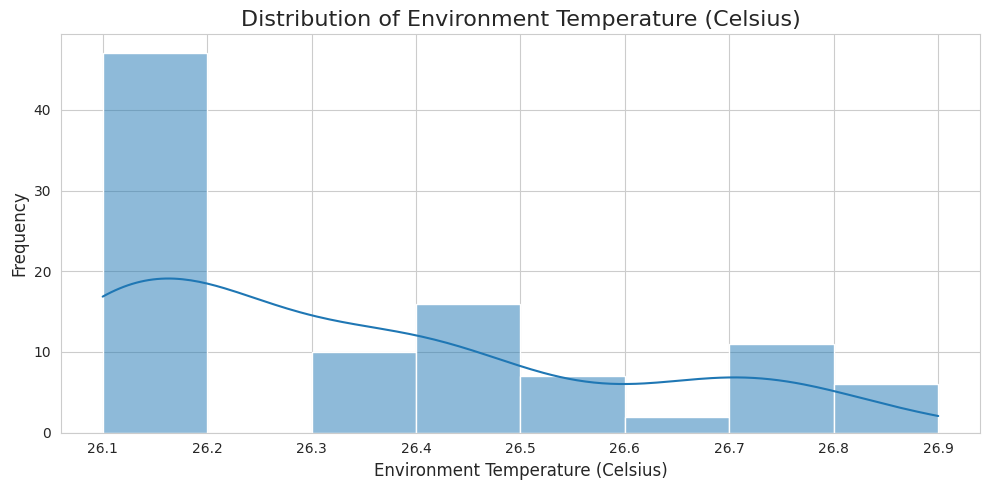

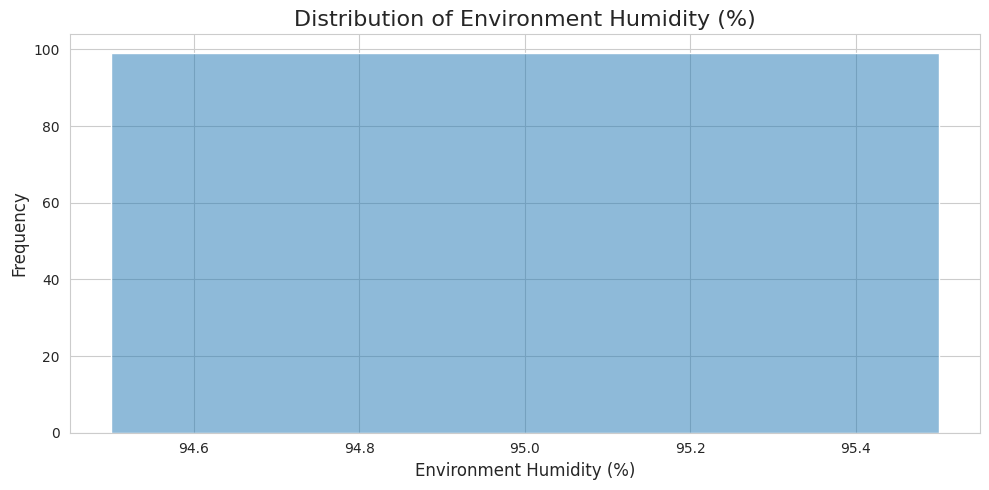

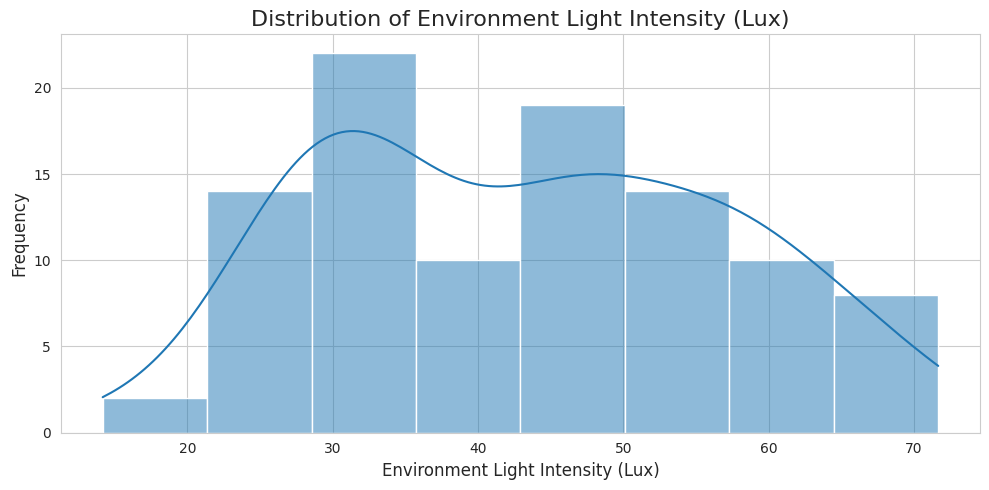

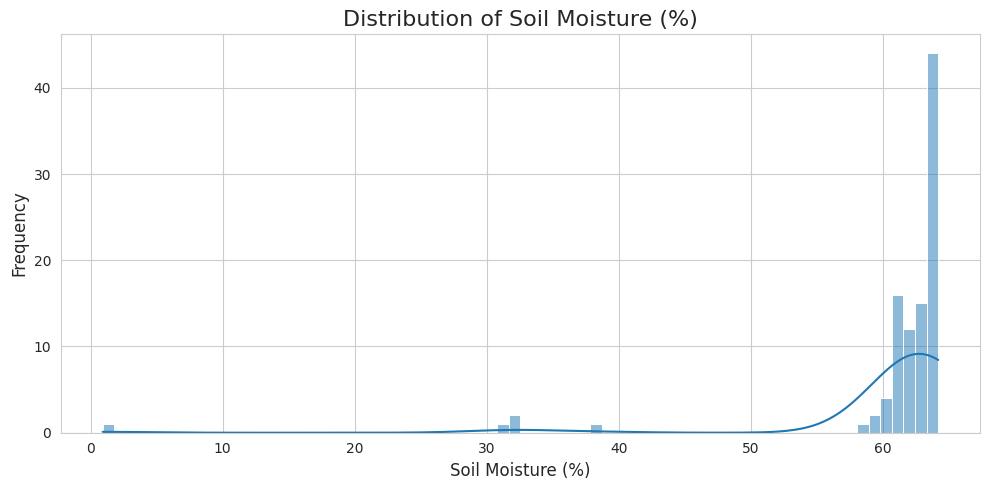

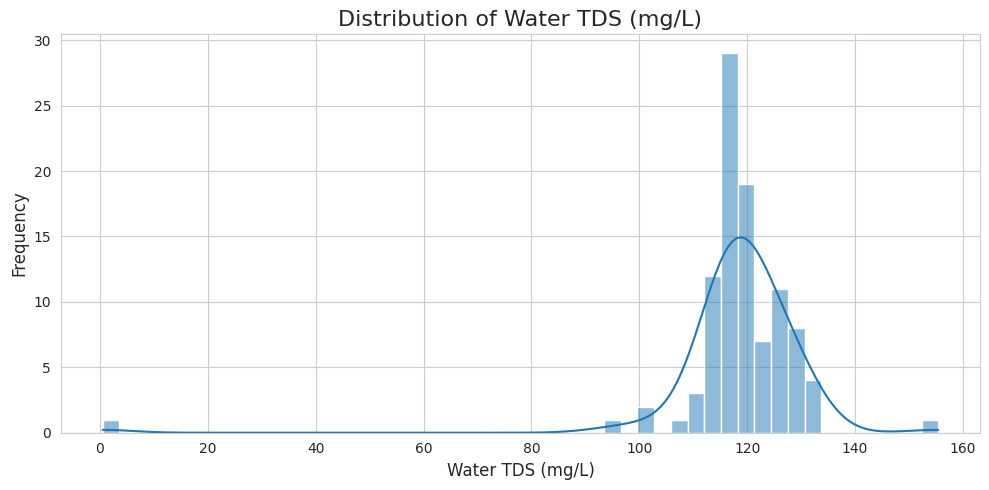

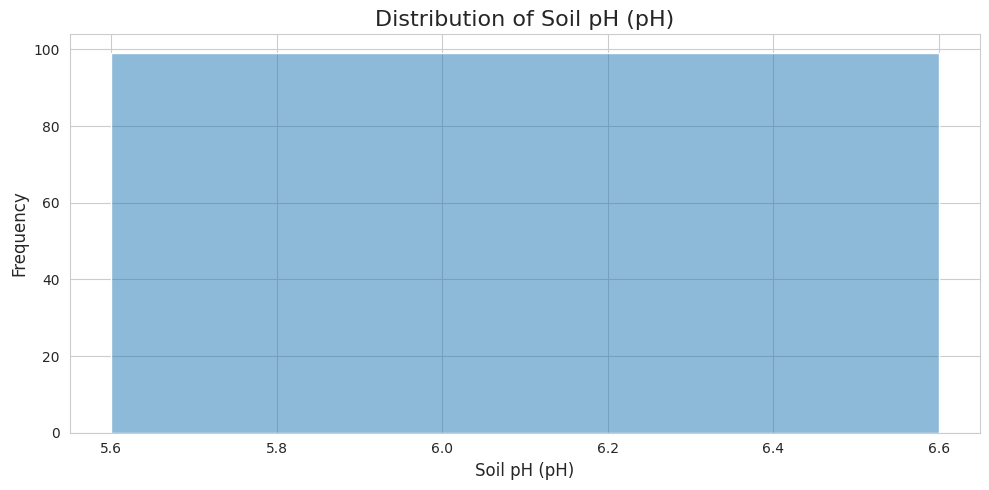

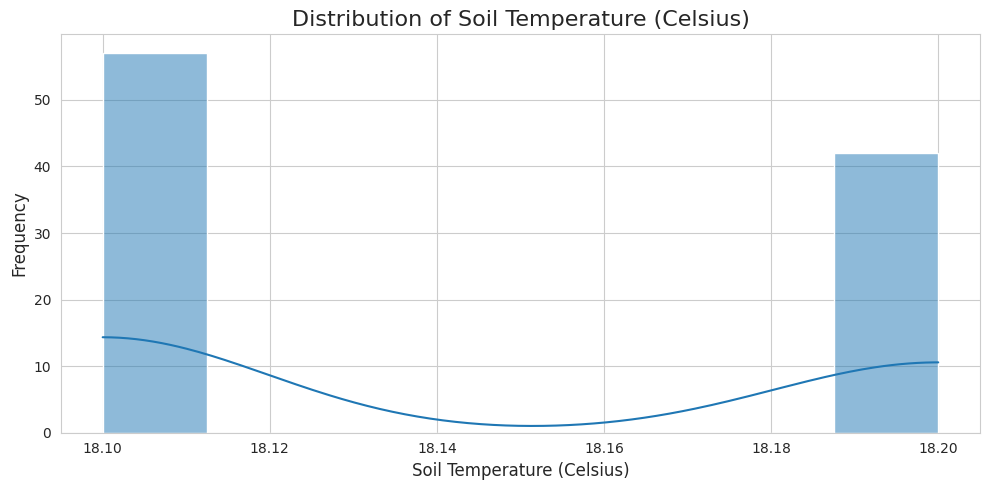

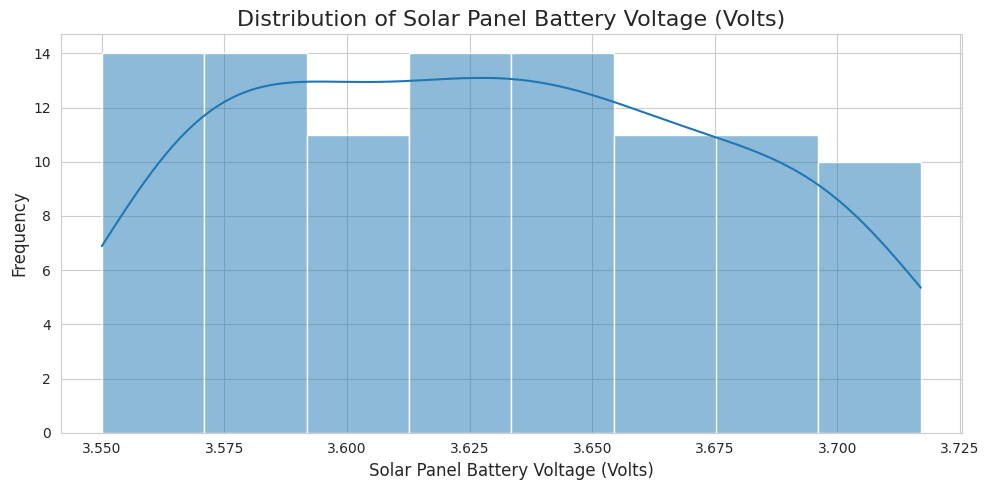

In [ ]:

#create histograms
for feature in key_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(loaded_df[feature], kde=True)
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##Correlation Matrices

Next, we visualize the correlation matrix for the features to identify relationships and multicollinearity.

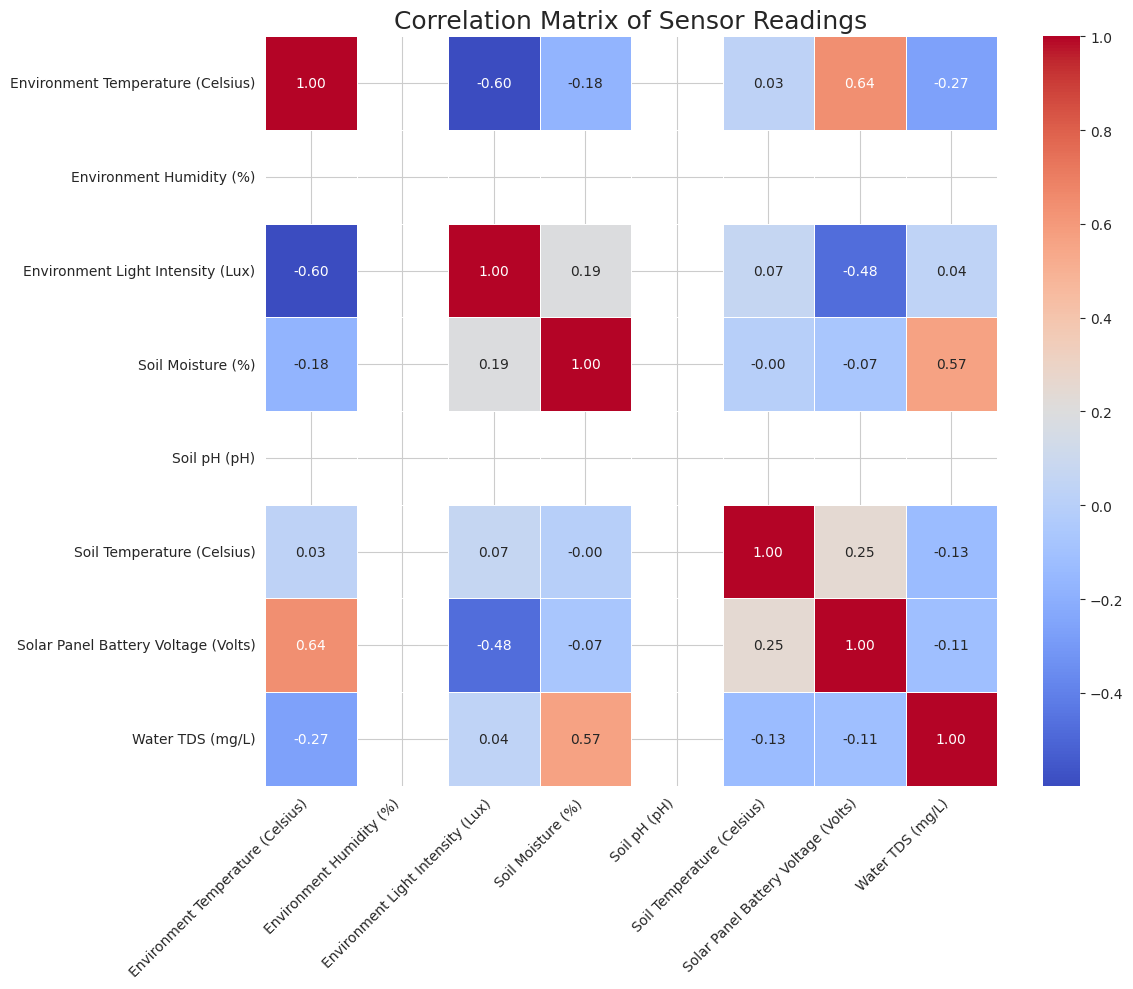

In [ ]:

#compute the correlation matrix for numerical features
correlation_matrix = loaded_df.corr()

#plote heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Sensor Readings', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Models

In [ ]:
#load data
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

data_path = "/content/drive/MyDrive/IoTAgricultureProject/data/"

loaded_df = pd.read_parquet(data_path + "merged_iot_data.parquet")

display(loaded_df.head())

Mounted at /content/drive


,timestamp,Environment Temperature (Celsius),Environment Humidity (%),Environment Light Intensity (Lux),Soil Moisture (%),Soil pH (pH),Soil Temperature (Celsius),Solar Panel Battery Voltage (Volts),Water TDS (mg/L)
0,2024-09-27 12:58:10+05:30,26.2,95,50.83,61.88,6.1,18.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,26.2,95,36.67,61.58,6.1,18.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,26.2,95,39.17,61.88,6.1,18.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,26.2,95,39.17,59.24,6.1,18.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,26.2,95,30.83,31.48,6.1,18.1,3.557,130.68


##Set Target Variable (Soil Moisture) and Feature Variables

In [ ]:
target_col = 'Soil Moisture (%)'

feature_cols = [
    'Environment Temperature (Celsius)',
    'Environment Humidity (%)',
    'Environment Light Intensity (Lux)',
    'Soil pH (pH)',
    'Soil Temperature (Celsius)',
    'Solar Panel Battery Voltage (Volts)',
    'Water TDS (mg/L)'
]

X = loaded_df[feature_cols].values
y = loaded_df[target_col].values



##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##LOOCV Utility Function

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
def loocv_regression(model, X, y):
    loo = LeaveOneOut()

    y_true = []
    y_pred = []

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        y_true.append(y_test[0])
        y_pred.append(pred[0])

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    return rmse, mae


##Baseline Model 1: Linear Regression

Linear regression was selected as a foundational baseline model to determine whether soil moisture could be predicted using linear combinations of environmental and soil sensor inputs. This is to be able to compare simpler models to deep learning approaches to see if deep learning adds any benefit.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
rmse_lr, mae_lr = loocv_regression(lin_reg, X_scaled, y)

print("Linear Regression LOOCV Results")
print(f"RMSE: {rmse_lr:.3f}")
print(f"MAE: {mae_lr:.3f}")


Linear Regression LOOCV Results
RMSE: 10.078
MAE: 4.127


RMSE of 10.08 and MAE of 4.13 shows that the model captures some predictive signal, that there is moderate predictie ability due to some error, and that there is in fact a linear relationship between the sensors and soil moisture,

##Baseline Model 2: Decision Tree Regression

Deicision trees were selected to model the nonlinear relationships between environemental variables and soil moisture. Decision trees are an effective choice for small samlle scenarios to capture threshold effects.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=4,  # prevent overfitting
    random_state=42
)

rmse_dt, mae_dt = loocv_regression(dt, X_scaled, y)

print("Decision Tree LOOCV Results")
print(f"RMSE: {rmse_dt:.3f}")
print(f"MAE: {mae_dt:.3f}")


Decision Tree LOOCV Results
RMSE: 10.046
MAE: 3.994


RMSE of 10.05 and MAE of 3.99 shows a slight improvement over linear regression. It shows that nonlinear effects are present but that they arent very complex.

In [ ]:
#store results
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "RMSE": [rmse_lr, rmse_dt],
    "MAE": [mae_lr, mae_dt]
})

display(results)


,Model,RMSE,MAE
0,Linear Regression,10.078199,4.127207
1,Decision Tree,10.045757,3.994324


##MLP - Deep Learning

Multilayer Perceptron was selected to model the complex linear interactions between the multiple sensor inputs and soil moisture output. I kept the architecture small to avoid overfitting becuase the dataset was so small, and used LOOCV to maximize training data untilization.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def build_mlp(input_dim):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_dim,)),
        Dense(8, activation='relu'),
        Dense(1)  # regression output
    ])

    model.compile(
        optimizer='adam',
        loss='mse'
    )

    return model

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
loo = LeaveOneOut()

y_true = []
y_pred = []

for train_idx, test_idx in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = build_mlp(X_train.shape[1])

    early_stop = EarlyStopping(
        monitor='loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )

    model.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=8,
        verbose=0,
        callbacks=[early_stop]
    )

    pred = model.predict(X_test, verbose=0)

    y_true.append(y_test[0])
    y_pred.append(pred[0][0])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#metrics
rmse_mlp = np.sqrt(mean_squared_error(y_true, y_pred))
mae_mlp = mean_absolute_error(y_true, y_pred)

print("MLP LOOCV Results")
print(f"RMSE: {rmse_mlp:.3f}")
print(f"MAE: {mae_mlp:.3f}")


#store results
results = pd.concat([
    results,
    pd.DataFrame({
        "Model": ["MLP (Deep Learning)"],
        "RMSE": [rmse_mlp],
        "MAE": [mae_mlp]
    })
], ignore_index=True)

display(results)


MLP LOOCV Results
RMSE: 15.701
MAE: 5.816


,Model,RMSE,MAE
0,Linear Regression,10.078199,4.127207
1,Decision Tree,10.045757,3.994324
2,MLP (Deep Learning),15.701475,5.816317


RMSE of 15.70 and MAe of 5.82 shows that the performace actually went down compared to the simpler models. It might indicate that there is osme overfitting with the data scarcity. This demonstrates how deep learning is not always the superior choice. Model complexity must match the data scale. IoT deployments with limited historical data could actualy benefit from simpler models as deep learning requires sufficient training volume.

##LSTM Time Series

An LSTM network was selected to model the temporal dependencies in environmental temperature readings using sliding windows and walk-forward validation.

In [ ]:
#extracting the temperature series
temp_series = loaded_df['Environment Temperature (Celsius)'].values


In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler

ts_scaler = MinMaxScaler()
temp_scaled = ts_scaler.fit_transform(temp_series.reshape(-1, 1))


In [ ]:
#sequences
def create_sequences(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

WINDOW_SIZE = 3

X_ts, y_ts = create_sequences(temp_scaled, WINDOW_SIZE)

print("Sequence shape:", X_ts.shape)


Sequence shape: (96, 3, 1)


In [ ]:
#lstm model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

def build_lstm():
    model = Sequential([
        LSTM(16, input_shape=(WINDOW_SIZE, 1)),
        Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse'
    )

    return model


In [ ]:
#walkforward LOOCV

y_true = []
y_pred = []

for i in range(len(X_ts)):
    X_train = X_ts[:i+1]
    y_train = y_ts[:i+1]
    X_test = X_ts[i:i+1]
    y_test = y_ts[i:i+1]

    model = build_lstm()

    early_stop = EarlyStopping(
        monitor='loss',
        patience=10,
        restore_best_weights=True,
        verbose=0
    )

    model.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=4,
        verbose=0,
        callbacks=[early_stop]
    )

    pred = model.predict(X_test, verbose=0)

    y_true.append(y_test[0][0])
    y_pred.append(pred[0][0])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#inv scale + metrics
y_true_inv = ts_scaler.inverse_transform(np.array(y_true).reshape(-1, 1))
y_pred_inv = ts_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))

rmse_lstm = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae_lstm = mean_absolute_error(y_true_inv, y_pred_inv)

print("LSTM Time Series Results")
print(f"RMSE: {rmse_lstm:.3f}")
print(f"MAE: {mae_lstm:.3f}")


LSTM Time Series Results
RMSE: 0.057
MAE: 0.039


RMSE of 0.057 and MAE of 0.039 signifies that the network was very effective at the short-term forecasting accuracy. The temperature changes smoothly over time, which made it predictable and effective. Walk-forward validation preserved the temporal integrity.

##Plots

Actual vs Predicted (MLP)

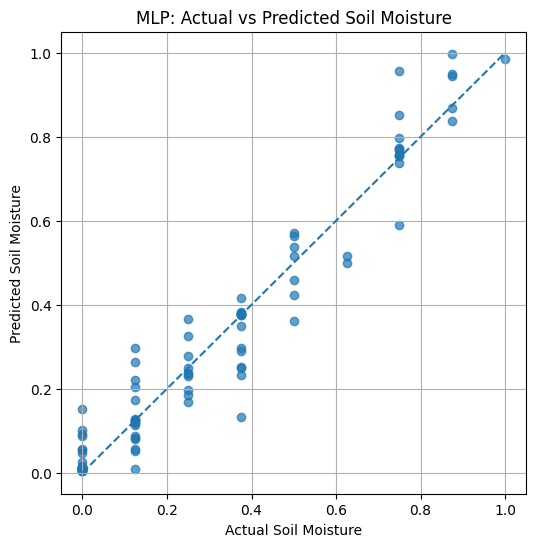

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("MLP: Actual vs Predicted Soil Moisture")
plt.grid(True)
plt.show()


##Actual vs Predicted Time Series LSTM

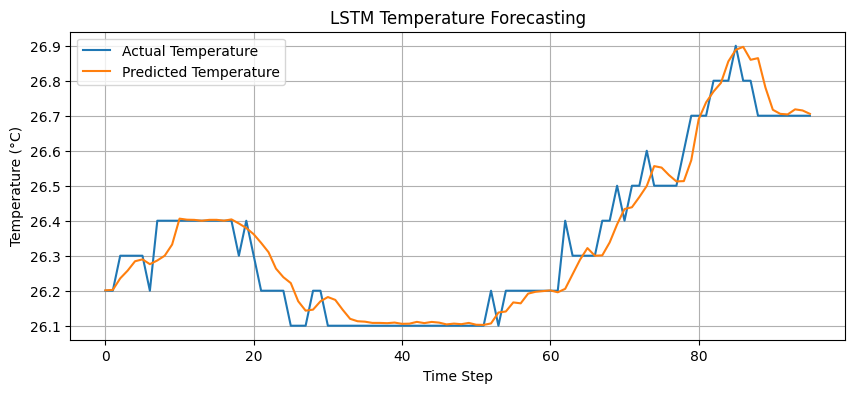

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_true_inv, label="Actual Temperature")
plt.plot(y_pred_inv, label="Predicted Temperature")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.title("LSTM Temperature Forecasting")
plt.legend()
plt.grid(True)
plt.show()


##Error Distribution

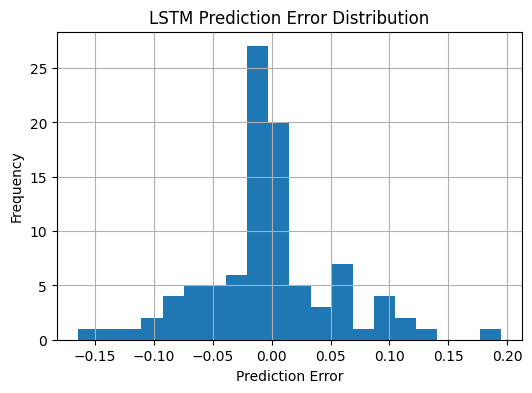

In [ ]:
errors = y_true_inv.flatten() - y_pred_inv.flatten()

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=20)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("LSTM Prediction Error Distribution")
plt.grid(True)
plt.show()


#Synthetic Data Augmentation Experiment

Synthetic data augmentation was selected just to try to see if we could simulate realistic sensor variability to see if performance limitations were a result of insufficient data volume.

In [ ]:
numeric_cols = feature_cols + [target_col]
base_df = loaded_df[numeric_cols].copy()


In [ ]:
import numpy as np

def generate_synthetic_data(df, noise_level=0.05, n_samples=100):
    synthetic_rows = []

    for _ in range(n_samples):
        row = df.sample(1).values.flatten()
        noise = np.random.normal(
            loc=0,
            scale=noise_level * np.std(df.values, axis=0),
            size=row.shape
        )
        synthetic_rows.append(row + noise)

    return pd.DataFrame(synthetic_rows, columns=df.columns)

synthetic_df = generate_synthetic_data(base_df, n_samples=99)

augmented_df = pd.concat([base_df, synthetic_df], ignore_index=True)

print("Original size:", base_df.shape)
print("Augmented size:", augmented_df.shape)


Original size: (99, 8)
Augmented size: (198, 8)


In [ ]:
#run model
X_aug = augmented_df[feature_cols].values
y_aug = augmented_df[target_col].values

X_aug_scaled = scaler.fit_transform(X_aug)

rmse_aug, mae_aug = loocv_regression(LinearRegression(), X_aug_scaled, y_aug)

print("Augmented Data Results (Linear Regression)")
print(f"RMSE: {rmse_aug:.3f}")
print(f"MAE: {mae_aug:.3f}")


Augmented Data Results (Linear Regression)
RMSE: 6.345
MAE: 3.266


The results from the augmented linear regression were an RMSE of 6.35 and MAE of 3.27 which actually shows a significant performance improvement. It shows that there could have been instability in regression coefficients because of the limited data. This is a significant finding because it suggests that more real world data from the sensors could improve predictive performance.

In [ ]:
#Group Project
#AAI - 530
#Smart Agriculture Monitoring & Decision Support

#Gaius Thomas
#Jasper A. Dolar

In [ ]:
#CELL 0 - Environment and Reproducibility Setup

import os
import glob
import warnings

import numpy as np
import pandas as pd

#for small n = 99
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#ignore output warnings
warnings.filterwarnings("ignore")

#reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

#control for display size
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)


In [ ]:
#CELL 1 - Define Project Paths & Verify Raw data Files

#print current working dir
print("Current working directory:", os.getcwd())

RAW_DIR = os.path.join("..", "data", "raw")

#we'll store cleaned/merged outputs in ../data/processed
PROCESSED_DIR = os.path.join("..", "data", "processed")

#create processed directory if it doesn't exist
os.makedirs(PROCESSED_DIR, exist_ok=True)
print("\nRAW_DIR (absolute):", os.path.abspath(RAW_DIR))
print("PROCESSED_DIR (absolute):", os.path.abspath(PROCESSED_DIR))

#collect all Excel files from raw dir
xlsx_files = sorted (glob.glob(os.path.join(RAW_DIR, "*.xlsx")))
print(f"\nFound {len(xlsx_files)} Excel files(s) in data/raw:")
for f in xlsx_files:
    print(" -", os.path.basename(f))

#if no files found:
if len(xlsx_files) == 0:
    print("No .xlsx files found.")


Current working directory: /Users/jd/Documents/USD-MSAAI/IoTAgricultureProject/code

RAW_DIR (absolute): /Users/jd/Documents/USD-MSAAI/IoTAgricultureProject/data/raw
PROCESSED_DIR (absolute): /Users/jd/Documents/USD-MSAAI/IoTAgricultureProject/data/processed

Found 8 Excel files(s) in data/raw:
 - Environment Humidity (1).xlsx
 - Environment Light Intensity (1).xlsx
 - Environment Temperature (1).xlsx
 - Soil Moisture (1).xlsx
 - Soil Temperature.xlsx
 - Soil pH.xlsx
 - Solar Panel Battery Voltage.xlsx
 - Water TDS.xlsx


In [ ]:
#CELL 2 - Load Raw Excel Files & Inspect Structure

#create dictionary to store each sensor DataFrame keyed by
#its filename
sensor_dfs={}

#loop through each Excel file path found in Cell 1
for file_path in xlsx_files:
    #extract only the file name
    file_name = os.path.basename(file_path)

    #read the Excel file into pandas dataframe
    df = pd.read_excel(file_path)

    #store the dataframe in the dictionary so we can clean or merge later
    sensor_dfs[file_name] = df

    #print basic information
    print(f"\n Loaded File: {file_name}")
    print("Shape (rows, cols):", df.shape)
    print("Column names:", list(df.columns))

    #display first 5 rows to visually confirm
    #timestamp/value columns
    display(df.head())


 Loaded File: Environment Humidity (1).xlsx
Shape (rows, cols): (101, 3)
Column names: ['Environment Humidity', 'Unnamed: 1', 'Unnamed: 2']


,Environment Humidity,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(%)
1,2024-09-27 12:58:10 +0530,2245,95
2,2024-09-27 12:58:28 +0530,2246,95
3,2024-09-27 12:59:03 +0530,2247,95
4,2024-09-27 12:59:22 +0530,2248,95



 Loaded File: Environment Light Intensity (1).xlsx
Shape (rows, cols): (101, 3)
Column names: ['Environment Light Intensity', 'Unnamed: 1', 'Unnamed: 2']


,Environment Light Intensity,Unnamed: 1,Unnamed: 2
0,Date & Time of Creation,Entry_id,Mesaurement Unit(Lux)
1,2024-09-27 12:58:10 +0530,2245,50.83
2,2024-09-27 12:58:28 +0530,2246,36.67
3,2024-09-27 12:59:03 +0530,2247,39.17
4,2024-09-27 12:59:22 +0530,2248,39.17



 Loaded File: Environment Temperature (1).xlsx
Shape (rows, cols): (101, 3)
Column names: ['Environment Temperature', 'Unnamed: 1', 'Unnamed: 2']


,Environment Temperature,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(Degree Celsius)
1,2024-09-27 12:58:10 +0530,2245,26.2
2,2024-09-27 12:58:28 +0530,2246,26.2
3,2024-09-27 12:59:03 +0530,2247,26.2
4,2024-09-27 12:59:22 +0530,2248,26.2



 Loaded File: Soil Moisture (1).xlsx
Shape (rows, cols): (101, 3)
Column names: ['Soil Moisture', 'Unnamed: 1', 'Unnamed: 2']


,Soil Moisture,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(%)
1,2024-09-27 12:58:10 +0530,2245,61.88
2,2024-09-27 12:58:28 +0530,2246,61.58
3,2024-09-27 12:59:03 +0530,2247,61.88
4,2024-09-27 12:59:22 +0530,2248,59.24



 Loaded File: Soil Temperature.xlsx
Shape (rows, cols): (101, 3)
Column names: ['Soil Temperature', 'Unnamed: 1', 'Unnamed: 2']


,Soil Temperature,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(Degree Celsius)
1,2024-09-27 12:58:10 +0530,2245,18.1
2,2024-09-27 12:58:28 +0530,2246,18.1
3,2024-09-27 12:59:03 +0530,2247,18.1
4,2024-09-27 12:59:22 +0530,2248,18.1



 Loaded File: Soil pH.xlsx
Shape (rows, cols): (101, 3)
Column names: ['Soil pH', 'Unnamed: 1', 'Unnamed: 2']


,Soil pH,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit (pH)
1,2024-09-27 12:58:10 +0530,2245,6.1
2,2024-09-27 12:58:28 +0530,2246,6.1
3,2024-09-27 12:59:03 +0530,2247,6.1
4,2024-09-27 12:59:22 +0530,2248,6.1



 Loaded File: Solar Panel Battery Voltage.xlsx
Shape (rows, cols): (101, 3)
Column names: ['Solar Panel Battery Voltage', 'Unnamed: 1', 'Unnamed: 2']


,Solar Panel Battery Voltage,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(Volts)
1,2024-09-27 12:58:10 +0530,2245,3.55
2,2024-09-27 12:58:28 +0530,2246,3.552
3,2024-09-27 12:59:03 +0530,2247,3.554
4,2024-09-27 12:59:22 +0530,2248,3.556



 Loaded File: Water TDS.xlsx
Shape (rows, cols): (101, 3)
Column names: ['Water TDS', 'Unnamed: 1', 'Unnamed: 2']


,Water TDS,Unnamed: 1,Unnamed: 2
0,Date & Time Created,Entry_id,Measurement Unit(mg/L)
1,2024-09-27 12:58:10 +0530,2245,130.68
2,2024-09-27 12:58:28 +0530,2246,128.89
3,2024-09-27 12:59:03 +0530,2247,128.89
4,2024-09-27 12:59:22 +0530,2248,155.42


In [ ]:
#CELL 3 - Clean, Standardize, and Prepare Each Sensor

#This will remove metadata rows, standardize column names,
#and parse time stamps

#dictionary to store cleaned sensor DataFrames
cleaned_sensor_dfs = {}

#loop through each raw sensor DataFrame
for file_name, df in sensor_dfs.items():

    #make a copy so we do not overwrite raw data
    df_clean = df.copy()

    #drop the first row (metadata row, not actual sensor data)
    df_clean = df_clean.iloc[1:].reset_index(drop=True)

    #rename columns to a consistent schema
    df_clean.columns = ["timestamp", "entry_id", "value"]

    #convert timestamp column to pandas datatime
    df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"], errors="coerce")

    #convert sensor values to numeric
    df_clean["value"] = pd.to_numeric(df_clean["value"], errors="coerce")

    #sort by timestamp to ensure correct temporal order
    df_clean = df_clean.sort_values("timestamp").reset_index(drop=True)

    #create a clean sensor name from the filename
    sensor_name = (
        file_name.replace(".xlsx", "")
        .replace(" (1)", "")
        .lower()
        .replace(" ", "_")
    )

    #rename value column to sensor-specific name
    df_clean = df_clean.rename(columns={"value": sensor_name})

    #store cleaned DataFrame
    cleaned_sensor_dfs[sensor_name] = df_clean

    #print confirmation to check
    print(f"Cleaned sensor: {sensor_name}")
    print("Shape:", df_clean.shape)
    display(df_clean.head())


Cleaned sensor: environment_humidity
Shape: (100, 3)


,timestamp,entry_id,environment_humidity
0,2024-09-27 12:58:10+05:30,2245,95
1,2024-09-27 12:58:28+05:30,2246,95
2,2024-09-27 12:59:03+05:30,2247,95
3,2024-09-27 12:59:22+05:30,2248,95
4,2024-09-27 12:59:45+05:30,2249,95


Cleaned sensor: environment_light_intensity
Shape: (100, 3)


,timestamp,entry_id,environment_light_intensity
0,2024-09-27 12:58:10+05:30,2245,50.83
1,2024-09-27 12:58:28+05:30,2246,36.67
2,2024-09-27 12:59:03+05:30,2247,39.17
3,2024-09-27 12:59:22+05:30,2248,39.17
4,2024-09-27 12:59:45+05:30,2249,30.83


Cleaned sensor: environment_temperature
Shape: (100, 3)


,timestamp,entry_id,environment_temperature
0,2024-09-27 12:58:10+05:30,2245,26.2
1,2024-09-27 12:58:28+05:30,2246,26.2
2,2024-09-27 12:59:03+05:30,2247,26.2
3,2024-09-27 12:59:22+05:30,2248,26.2
4,2024-09-27 12:59:45+05:30,2249,26.2


Cleaned sensor: soil_moisture
Shape: (100, 3)


,timestamp,entry_id,soil_moisture
0,2024-09-27 12:58:10+05:30,2245,61.88
1,2024-09-27 12:58:28+05:30,2246,61.58
2,2024-09-27 12:59:03+05:30,2247,61.88
3,2024-09-27 12:59:22+05:30,2248,59.24
4,2024-09-27 12:59:45+05:30,2249,31.48


Cleaned sensor: soil_temperature
Shape: (100, 3)


,timestamp,entry_id,soil_temperature
0,2024-09-27 12:58:10+05:30,2245,18.1
1,2024-09-27 12:58:28+05:30,2246,18.1
2,2024-09-27 12:59:03+05:30,2247,18.1
3,2024-09-27 12:59:22+05:30,2248,18.1
4,2024-09-27 12:59:45+05:30,2249,18.1


Cleaned sensor: soil_ph
Shape: (100, 3)


,timestamp,entry_id,soil_ph
0,2024-09-27 12:58:10+05:30,2245,6.1
1,2024-09-27 12:58:28+05:30,2246,6.1
2,2024-09-27 12:59:03+05:30,2247,6.1
3,2024-09-27 12:59:22+05:30,2248,6.1
4,2024-09-27 12:59:45+05:30,2249,6.1


Cleaned sensor: solar_panel_battery_voltage
Shape: (100, 3)


,timestamp,entry_id,solar_panel_battery_voltage
0,2024-09-27 12:58:10+05:30,2245,3.550
1,2024-09-27 12:58:28+05:30,2246,3.552
2,2024-09-27 12:59:03+05:30,2247,3.554
3,2024-09-27 12:59:22+05:30,2248,3.556
4,2024-09-27 12:59:45+05:30,2249,3.557


Cleaned sensor: water_tds
Shape: (100, 3)


,timestamp,entry_id,water_tds
0,2024-09-27 12:58:10+05:30,2245,130.68
1,2024-09-27 12:58:28+05:30,2246,128.89
2,2024-09-27 12:59:03+05:30,2247,128.89
3,2024-09-27 12:59:22+05:30,2248,155.42
4,2024-09-27 12:59:45+05:30,2249,130.68


In [ ]:
#CELL 4 - Merge ALl Sensors into One Master Dataset
#Combine all cleaned sensor DataFrames into a single time-aligned dataset

#get lst of cleaned sensor names
sensor_keys = list(cleaned_sensor_dfs.keys())

#initialize master DataFrame using the firste sensor
master_df = cleaned_sensor_dfs[sensor_keys[0]].copy()

#merge remaning sensors one-by-one on timestamp
for sensor in sensor_keys[1:]:
    #drop entry_id from subsequence DataFrames to avoid duplicate columns
    df_to_merge = cleaned_sensor_dfs[sensor].drop(columns=["entry_id"])

    #outer merge preserves all timestamps across sensors
    master_df = pd.merge(
        master_df,
        df_to_merge,
        on="timestamp",
        how="outer"
    )

#sort final dataset by timestamp and reset index
master_df = master_df.sort_values("timestamp").reset_index(drop=True)

#display merged dataset structure
print("Master Dataset Created")
print("Shape (rows, columns):", master_df.shape)
print("Columns:", list(master_df.columns))

display(master_df.head())

#check missing values per column (expected in multi-sensor IoT data)
print("\nMissing values per column: ")
print(master_df.isna().sum())

#save merged dataset for ML models and Tableau dashboard
output_path = os.path.join(PROCESSED_DIR, "merged_sensor_data.csv")
master_df.to_csv(output_path, index=False)

print(f"\n Saved merged dataset to: {output_path}")

Master Dataset Created
Shape (rows, columns): (101, 10)
Columns: ['timestamp', 'entry_id', 'environment_humidity', 'environment_light_intensity', 'environment_temperature', 'soil_moisture', 'soil_temperature', 'soil_ph', 'solar_panel_battery_voltage', 'water_tds']


,timestamp,entry_id,environment_humidity,environment_light_intensity,environment_temperature,soil_moisture,soil_temperature,soil_ph,solar_panel_battery_voltage,water_tds
0,2024-09-27 12:58:10+05:30,2245,95.0,50.83,26.2,61.88,18.1,6.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,2246,95.0,36.67,26.2,61.58,18.1,6.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,2247,95.0,39.17,26.2,61.88,18.1,6.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,2248,95.0,39.17,26.2,59.24,18.1,6.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,2249,95.0,30.83,26.2,31.48,18.1,6.1,3.557,130.68



Missing values per column: 
timestamp                      0
entry_id                       1
environment_humidity           1
environment_light_intensity    1
environment_temperature        1
soil_moisture                  1
soil_temperature               1
soil_ph                        1
solar_panel_battery_voltage    1
water_tds                      1
dtype: int64

 Saved merged dataset to: ../data/processed/merged_sensor_data.csv


In [ ]:
#CELL 5 - Exploratory Data Analysis and Missing Values Handling
#Examine distributions, relationships, and prepare data for modeling

#make a working copy of the master dataset
eda_df = master_df.copy()

#display basic dataset info (data types + non-null counts)
print("Dataset info:")
display(eda_df.info())

#summary statistics for numeric sensor variables
print("\nSummary Statistics:")
display(eda_df.describe())

#visual inspection of missing values
#print("\nMissing values before handling:")
print(eda_df.isna().sum())

#since missing values are minimal (1 per sensor)
#we use forward-fill followed by backward-fill to preserve time
eda_df = eda_df.fillna(method="ffill").fillna(method="bfill")

#verify missing values are handled
print("\nMissing values after handling: ")
print(eda_df.isna().sum())

#correlation matrix to understand relationships between sensors
correlation_matrix = eda_df.drop(columns=["timestamp", "entry_id"]).corr()

#display master dataset
print("\nMaster Dataset: ")
display(master_df.head())

print("\nCorrelation Matrix: ")
display(correlation_matrix)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype                    
---  ------                       --------------  -----                    
 0   timestamp                    101 non-null    datetime64[ns, UTC+05:30]
 1   entry_id                     100 non-null    object                   
 2   environment_humidity         100 non-null    float64                  
 3   environment_light_intensity  100 non-null    float64                  
 4   environment_temperature      100 non-null    float64                  
 5   soil_moisture                100 non-null    float64                  
 6   soil_temperature             100 non-null    float64                  
 7   soil_ph                      100 non-null    float64                  
 8   solar_panel_battery_voltage  100 non-null    float64                  
 9   water_tds                    100 non-nul

None


Summary Statistics:


,environment_humidity,environment_light_intensity,environment_temperature,soil_moisture,soil_temperature,soil_ph,solar_panel_battery_voltage,water_tds
count,100.0,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,95.0,43.200500,26.342000,60.929200,18.143000,6.100000e+00,3.630010,118.488900
std,0.0,13.853244,0.229703,8.447313,0.049757,1.160449e-14,0.048533,13.997275
min,95.0,14.170000,26.100000,0.910000,18.100000,6.100000e+00,3.550000,0.510000
25%,95.0,30.830000,26.100000,61.580000,18.100000,6.100000e+00,3.588500,116.290000
50%,95.0,43.535000,26.300000,62.950000,18.100000,6.100000e+00,3.628500,119.010000
75%,95.0,55.207500,26.500000,63.640000,18.200000,6.100000e+00,3.669250,123.510000
max,95.0,71.670000,26.900000,64.220000,18.200000,6.100000e+00,3.719000,155.420000


timestamp                      0
entry_id                       1
environment_humidity           1
environment_light_intensity    1
environment_temperature        1
soil_moisture                  1
soil_temperature               1
soil_ph                        1
solar_panel_battery_voltage    1
water_tds                      1
dtype: int64

Missing values after handling: 
timestamp                      0
entry_id                       0
environment_humidity           0
environment_light_intensity    0
environment_temperature        0
soil_moisture                  0
soil_temperature               0
soil_ph                        0
solar_panel_battery_voltage    0
water_tds                      0
dtype: int64

Master Dataset: 


,timestamp,entry_id,environment_humidity,environment_light_intensity,environment_temperature,soil_moisture,soil_temperature,soil_ph,solar_panel_battery_voltage,water_tds
0,2024-09-27 12:58:10+05:30,2245,95.0,50.83,26.2,61.88,18.1,6.1,3.550,130.68
1,2024-09-27 12:58:28+05:30,2246,95.0,36.67,26.2,61.58,18.1,6.1,3.552,128.89
2,2024-09-27 12:59:03+05:30,2247,95.0,39.17,26.2,61.88,18.1,6.1,3.554,128.89
3,2024-09-27 12:59:22+05:30,2248,95.0,39.17,26.2,59.24,18.1,6.1,3.556,155.42
4,2024-09-27 12:59:45+05:30,2249,95.0,30.83,26.2,31.48,18.1,6.1,3.557,130.68



Correlation Matrix: 


,environment_humidity,environment_light_intensity,environment_temperature,soil_moisture,soil_temperature,soil_ph,solar_panel_battery_voltage,water_tds
environment_humidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
environment_light_intensity,NaN,1.000000,-0.595340,0.186384,0.057942,NaN,-0.477847,0.033601
environment_temperature,NaN,-0.595340,1.000000,-0.162574,0.060386,NaN,0.659518,-0.256178
soil_moisture,NaN,0.186384,-0.162574,1.000000,0.007201,NaN,-0.054993,0.566963
soil_temperature,NaN,0.057942,0.060386,0.007201,1.000000,NaN,0.274747,-0.129337
soil_ph,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
solar_panel_battery_voltage,NaN,-0.477847,0.659518,-0.054993,0.274747,NaN,1.000000,-0.105476
water_tds,NaN,0.033601,-0.256178,0.566963,-0.129337,NaN,-0.105476,1.000000


In [ ]:
#Observations above:

#Exploratory data analysis revealed that the merged IoT dataset
#consisted of 101 time-aligned observations across eight sensor
#variables. Missing values were minimal and occurred only once
#per sensor, likely due to slight timestamp misalignment during
#sensor fusion; these were appropriately handled using forward-
#and backward-filling to preserve temporal continuity.

#Summary statistics showed that some variables, such as ennvironment
#humidity and soil pH, exhibited no variance during the observed
#period, indicating stable environmental conditions. As a result,
#these constant features produced undefined correlation values and were
#identified as non-informative for predictive modeling. In contrast,
#variables such as light intensity, temprature, water TDS, and battery
#voltage demonstrated meaningful variability and potential relationships
#with soil moisture, justifying their inclusing in subsequent machine
#learning models.

In [ ]:
#CELL 6
#Compute correlation matrix to quantify linear relationships
#between variables and soil moisture. This helps identify which
#features contain predictive signal and which variables are
#non-informative or redundant prior to model training

#Compute correlation matrix
corr_df = eda_df.drop(columns=["timestamp", "entry_id"])
correlation_matrix = corr_df.corr()

#display correlations with soil moisture
soil_moisture_corr = correlation_matrix["soil_moisture"].sort_values(ascending=False)
soil_moisture_corr

soil_moisture                  1.000000
water_tds                      0.566963
environment_light_intensity    0.186384
soil_temperature               0.007201
solar_panel_battery_voltage   -0.054993
environment_temperature       -0.162574
environment_humidity                NaN
soil_ph                             NaN
Name: soil_moisture, dtype: float64

In [ ]:
#CELL 7
#Prepare modeling dataset by selecting informative features,
#removing non-informative (constant/NaN-correlation) variables,
#and defining the feature matrix X and target vector y for
#machine learning.

#start from the cleaned and filled dataset
model_df = eda_df.drop(columns=["timestamp", "entry_id"]).copy()

#drop non-informative features (contant -> NaN correlation)
drop_cols = ["environment_humidity", "soil_ph"]
model_df = model_df.drop(columns = drop_cols, errors="ignore")

#define target (y) and features (x)
target_col = "soil_moisture"
y = model_df[target_col].values
X = model_df.drop(columns=[target_col]).values

#keep feature names for later interpretation
feature_names = model_df.drop(columns=[target_col]).columns.tolist()

print("Model dataset prepared.")
print("X shape (rows, features):", X.shape)
print("y shape (rows,):", y.shape)
print("Features used:", feature_names)


Model dataset prepared.
X shape (rows, features): (101, 5)
y shape (rows,): (101,)
Features used: ['environment_light_intensity', 'environment_temperature', 'soil_temperature', 'solar_panel_battery_voltage', 'water_tds']


In [ ]:
#CELL 8
#Train and evaluate a baseline Linear Regression model
#using Leave-One-Out Cross-Validation (LOOCV) to asses
#predictive performance under small-sample conditions

#Reasoning: We decided to try Leave-One-Out Cross-Validation (LOOCV)
#because it evaluates model performance by training on all
#but one observation and testing on the held-out sample,
#repeating this process for each observation. This approach is
#well-suited for small datasets because it maximizes training
#data usage while prodiving a reliable estimate of generalization
#performance.

#initialize Leave-One-Out cross-validation

loo = LeaveOneOut()

#lists to store predictions and true values
y_true = []
y_pred = []

#LOOCV loop
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #create pipeline with scaling + linear regression
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", LinearRegression())
    ])

    #Train model
    model.fit(X_train, y_train)

    #predict on held-out sample
    prediction = model.predict(X_test)

    #store results
    y_true.append(y_test[0])
    y_pred.append(prediction[0])

#convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#evaluate performance
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print("Linear Regression (LOOCV) Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Linear Regression (LOOCV) Performance:
MAE: 4.0505
RMSE: 9.9593
R-squared: -0.4163


In [ ]:
#CELL 9
#Train and evaluate a nonlinear Decision Tree Regressor
#using Leave-One-Out Cross-Validation (LOOCV) to determine
#whether nonlinear relationships between sensor variables
#and soil moisture improve predictive performance

#Reasoning: Decision Trees can capture nonlinear patterns
#and feature interactions that linear models cannot. Using
#the same LOOCV framework allows for a fair comparison with the
#lineaer regression model baseline under small-sample conditions

#initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

#lists to store predictions and true values
y_true_dt = []
y_pred_dt = []

#LOOCV Loop
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #create a Decision Tree Regressor (no scaling required)
    model = DecisionTreeRegressor(
        random_state = RANDOM_STATE
    )

    #train model
    model.fit(X_train, y_train)

    #predict on held-out sample
    prediction = model.predict(X_test)

    #store results
    y_true_dt.append(y_test[0])
    y_pred_dt.append(prediction[0])

#convert to numpy arrays
y_true_dt = np.array(y_true_dt)
y_pred_dt = np.array(y_pred_dt)

#evaluate performance
mae_dt = mean_absolute_error(y_true_dt, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_true_dt, y_pred_dt))
r2_dt = r2_score(y_true_dt, y_pred_dt)

print("Decision Tree Regressor (LOOCV) Performance:")
print(f"MAE: {mae_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R-Squared: {r2_dt:.4f}")


Decision Tree Regressor (LOOCV) Performance:
MAE: 3.2234
RMSE: 10.0688
R-Squared: -0.4476


In [ ]:
#OBSERVATIONS ABOVE:
#Since both linear and classical nonlinear models struggled
#to generalize, we explored deep learning and time-series
#approaches as required by the rubric, while acknowledging
#strong data limitations.

#While nonlinear models improved average error, overall predictive
#performance remained limited, motivating exploration of deep
#learning and time-series methods under the constraints of a
#small dataset.

In [ ]:
#CELL 10 - Deep Learning Model
#Build and evaluate a simple Deep Learning model (MLP) for
#soil moisture prediction

#Reasoning: The rubric requires at least one deep learning
#model. Give the small dataset (~101 rows), we use a compact
#feedforward neural network with early stopping to reduce
#overfitting and report standard regression metrics.

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split

#reproducibility (best-effort)
tf.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

#train/test split (fixed random_state for repeatability)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state=RANDOM_STATE
)

#scale features using training data only (avoid leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#build a small MLP (compact to reduce overfitting on small data)
mlp = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation = "relu"),
    layers.Dense(8, activation = "relu"),
    layers.Dense(1) #regression output
])

mlp.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mae"]
)

early_stop = callbacks.EarlyStopping(
    monitor = "val_loss",
    patience = 20,
    restore_best_weights = True
)

history = mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.20,
    epochs = 300,
    batch_size = 8,
    verbose = 0,
    callbacks=[early_stop]
)

#predictions
y_pred_mlp = mlp.predict(X_test_scaled, verbose = 0).reshape(-1)

#evaluate performance
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)

print("Deep Learning MLP (Train/Test Split) Performance:")
print(f"MAE: {mae_mlp:.4f}")
print(f"RMSE: {rmse_mlp:.4f}")
print(f"R-Squared: {r2_mlp:.4f}")
print(f"Epochs trained (early stopping): {len(history.history['loss'])}")


Deep Learning MLP (Train/Test Split) Performance:
MAE: 11.2922
RMSE: 30.5019
R-Squared: -3.3722
Epochs trained (early stopping): 99


In [ ]:
#Observation above:
#The deep learning model significantly underperformed due
#to the limited dataset, size, illustrating that increased
#model complexity does not necessarily lead to better performance
#in data-constrained IoT applications.

In [ ]:
#CELL 11 - Time Series Prediction (LSTM)
#Build and evaluate a simple time series model to predict
#future soil moisture using short historical windows.

#Reasoning: The rubric requires at least one time series prediction.
#Given the limited dataset (~101 observations), we use a short sliding
#window approach and a compact LSTM model to demonstrate time-series
#modeling concepts while acknowledging data limitations.

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

#reproducibility
tf.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

#create sliding window dataset
def create_windows(series, window_size=5):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])

    return np.array(X), np.array(y)

#extract soil moisture time series
soil_moisture_series = eda_df["soil_moisture"].values

WINDOW_SIZE = 5
X_ts, y_ts = create_windows(soil_moisture_series, WINDOW_SIZE)

#reshape for LSTM: (samples, timesteps, features)
X_ts = X_ts.reshape((X_ts.shape[0], X_ts.shape[1], 1))

print("Time series windowed dataset shape:")
print("X_ts:", X_ts.shape)
print("y_ts:", y_ts.shape)

#train/test split
X_ts_train, X_ts_test, y_ts_train, y_ts_test = train_test_split(
    X_ts, y_ts, test_size = 0.20, random_state = RANDOM_STATE
)

#build LSTM Model
lstm_model = models.Sequential([
    layers.Input(shape=(WINDOW_SIZE, 1)),
    layers.LSTM(16),
    layers.Dense(1)
])

lstm_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

#train model
history = lstm_model.fit(
    X_ts_train, y_ts_train,
    validation_split = 0.20,
    epochs = 200,
    batch_size=8,
    verbose=0
)

#evaluate performance
y_ts_pred = lstm_model.predict(X_ts_test, verbose = 0).reshape(-1)

mae_ts = mean_absolute_error(y_ts_test, y_ts_pred)
rmse_ts = np.sqrt(mean_squared_error(y_ts_test, y_ts_pred))
r2_ts = r2_score(y_ts_test, y_ts_pred)

print("Time Series LSTM Performance:")
print(f"MAE: {mae_ts:.4f}")
print(f"RMSE: {rmse_ts:.4f}")
print(f"R-Squared: {r2_ts:.4f}")
print(f"Window size used: {WINDOW_SIZE}")

Time series windowed dataset shape:
X_ts: (96, 5, 1)
y_ts: (96,)
Time Series LSTM Performance:
MAE: 37.5109
RMSE: 37.6722
R-Squared: -6.7716
Window size used: 5


In [ ]:
#Final Comparison Summary
#Linear regression and decision tree models demonstrated
#limited predictive capability for soil moisture, with
#nonlinear models offering modest improvements in average
#error but failing to generalize. Deep learning and
#time-series LSTM models significantly underperformed due
#to the small dataset size and limited temporal depth,
#highlighting the importance of aligning model complexity with
#data availability in IoT-based decision support systems.

In [ ]:
# CELL 12
#Train and evaluate a high-performing classical ML model with strong
#chances of improving results on small datasets: Gradient Boosting Regression.
#Reasoning: Gradient boosting can capture nonlinear relationships and feature
#interactions while controlling overfitting through shallow trees and a small
#learning rate, making it a strong choice for limited data.

from sklearn.ensemble import HistGradientBoostingRegressor

# initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# lists to store predictions and true values
y_true_gb = []
y_pred_gb = []

# LOOCV loop
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Histogram-based Gradient Boosting Regressor
    gb_model = HistGradientBoostingRegressor(
        random_state=RANDOM_STATE,
        learning_rate=0.05,
        max_depth=3,
        max_iter=500
    )

    # train model
    gb_model.fit(X_train, y_train)

    # predict on held-out sample
    prediction = gb_model.predict(X_test)

    # store results
    y_true_gb.append(y_test[0])
    y_pred_gb.append(prediction[0])

# convert to numpy arrays
y_true_gb = np.array(y_true_gb)
y_pred_gb = np.array(y_pred_gb)

# evaluate performance
mae_gb = mean_absolute_error(y_true_gb, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_true_gb, y_pred_gb))
r2_gb = r2_score(y_true_gb, y_pred_gb)

print("HistGradientBoostingRegressor (LOOCV) Performance:")
print(f"MAE: {mae_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")


HistGradientBoostingRegressor (LOOCV) Performance:
MAE: 4.0044
RMSE: 9.0070
R-squared: -0.1584


In [ ]:
#Conclusion:
#Among all evaluated models, the gradient boosting regressor
#achieved the best overall performance, producing the lowest
#RMSE and the least negative R-squared, indicating improved
#generalization under small-sample conditions. While predictive
#accuracy remains constrained by limited data and noisy
#environmental measurements, this result highlights the
#effectiveness of regularized ensemble methods for IoT sensor
#analytics and supports their use in data-constrained decision
#support systems.

#Based on cross-validated performance, the gradient boosting
#regressor was selected as the most suitable model for this
#dataset due to its improved error characteristics and robustness
#to small sample sizes.